In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Carregando o dfset
df = pd.read_csv("ObesityDataSet.csv", sep=',')

# Convertendo variáveis categóricas para numéricas
df.Age = df.Age.astype('int64')
df.Height = df.Height.astype('int64')
df.Weight = df.Weight.astype('int64')
df.FCVC = df.FCVC.astype('int64')
df.NCP = df.NCP.astype('int64')
df.CH2O = df.CH2O.astype('int64')
df.FAF = df.FAF.astype('int64')
df.TUE = df.TUE.astype('int64')

df.Gender = df.Gender.replace({'Male': 0, 'Female': 1})
df.family_history_with_overweight = df.family_history_with_overweight.replace({'yes': 0, 'no': 1})
df.FAVC = df.FAVC.replace ({'yes': 0, 'no': 1})
df.CAEC = df.CAEC.replace ({'Sometimes': 0, 'Frequently': 1, 'Always': 2, 'no': 3})
df.SMOKE = df.SMOKE.replace({'yes': 0, 'no': 1})
df.SCC = df.SCC.replace({'yes': 0, 'no': 1})
df.CALC = df.CALC.replace({'Sometimes': 0, 'Frequently': 1, 'Always': 2, 'no': 3})
df.MTRANS = df.MTRANS.replace({'Public_Transportation': 0, 'Walking': 1, 'Automobile': 2, 'Motorbike': 3, 'Bike': 4})
df.NObeyesdad = df.NObeyesdad.replace({'Normal_Weight': 0, 'Overweight_Level_I': 1, 'Overweight_Level_II': 2, 'Insufficient_Weight': 3, 
                                       'Obesity_Type_I': 4, 'Obesity_Type_II': 4, 'Obesity_Type_III': 5})



# # Aplicando codificação one-hot para variáveis categóricas
# df = pd.get_dummies(df, columns=['NObeyesdad'], drop_first=True)

# Selecionando as colunas relevantes para o clustering
X = df.iloc[:, 1:-1]

# Padronizando os dados para melhor desempenho do K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df.head()
df.info()
df.shape 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Gender                          2111 non-null   int64
 1   Age                             2111 non-null   int64
 2   Height                          2111 non-null   int64
 3   Weight                          2111 non-null   int64
 4   family_history_with_overweight  2111 non-null   int64
 5   FAVC                            2111 non-null   int64
 6   FCVC                            2111 non-null   int64
 7   NCP                             2111 non-null   int64
 8   CAEC                            2111 non-null   int64
 9   SMOKE                           2111 non-null   int64
 10  CH2O                            2111 non-null   int64
 11  SCC                             2111 non-null   int64
 12  FAF                             2111 non-null   int64
 13  TUE

(2111, 17)

In [3]:

# Encontrando o número ideal de clusters usando o método do cotovelo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

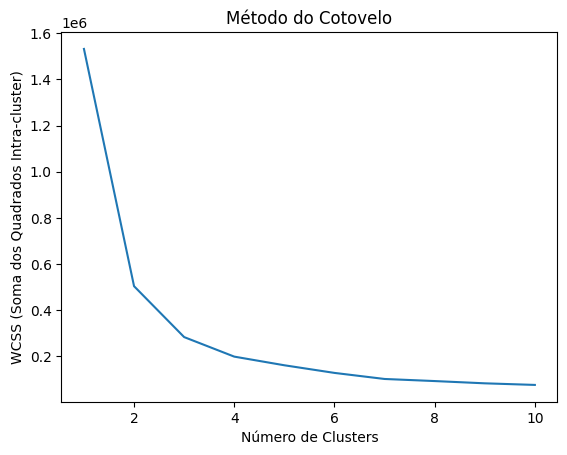

In [4]:
# Plotando o gráfico do método do cotovelo
plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Soma dos Quadrados Intra-cluster)')
plt.show()

In [5]:
# Escolhendo um número de clusters com base no gráfico (o ponto de "cotovelo")
# Vamos assumir, por exemplo, que o número ideal de clusters é 3
num_clusters = 5

# Aplicando o algoritmo K-Means com o número escolhido de clusters
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

# Exibindo os resultados
print(df[['NObeyesdad', 'Cluster']])
# print(df[['NObeyesdad_Normal_Weight', 'NObeyesdad_Overweight', 'NObeyesdad_Obesity_Type_I', 'Cluster']])

      NObeyesdad  Cluster
0              0        3
1              0        0
2              0        2
3              1        2
4              2        2
...          ...      ...
2106           5        4
2107           5        4
2108           5        4
2109           5        4
2110           5        4

[2111 rows x 2 columns]


In [6]:
# Lista de exemplo para predição
usuario = [[1, 21, 1.62, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2]]

# Predizendo o cluster do usuário
teste= kmeans.predict(usuario)

# Exibindo o resultado
print(f"O usuário pertence ao Cluster {teste}")

O usuário pertence ao Cluster [0]


c:\Users\Cliente\Desktop\MachineLearning\venvml\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
